In [9]:
import tensorflow
physical_devices = tensorflow.config.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

## Dogs vs Cats Image Classification - LeNet5

In [10]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
classes = 2
img_width, img_height, img_channels = 224, 224, 3
input_shape = (img_width, img_height, img_channels)

Num GPUs Available:  1


In [11]:
from utilities import get_train_val_iterator
train_iterator, val_iterator = get_train_val_iterator( 
    input_shape, 
    "datasets//dogs-vs-cats//train",
    "datasets//dogs-vs-cats//val",
    batch_size = 64
)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


### LeNet5 Sequential API

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential( name="LeNet5_basic")

# 1 Convolution Layer
model.add( Conv2D( 6, kernel_size=(5,5), padding="SAME", strides = 2,
        activation="relu", input_shape=(img_height, img_width, img_channels ) ))
model.add( MaxPooling2D( pool_size=(2,2) ))

# 2 Convolution Layer
model.add( Conv2D(16, kernel_size=(5,5), strides = 1, activation="relu" ) )
model.add( MaxPooling2D( pool_size=(2,2) ))

# Dense Layers
model.add( Flatten() )
model.add( Dense( 120, activation='relu' ) )
model.add( Dense( 84, activation='relu' ) )

# Output
model.add( Dense( classes, activation='softmax' ) )
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "LeNet5_basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               1298040   
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [13]:
earlyStopping = tensorflow.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=5, verbose=1 )

history = model.fit_generator(
    generator = train_iterator, 
    steps_per_epoch = len(train_iterator), 
    validation_data = val_iterator, 
    validation_steps = len(val_iterator), 
    epochs = 500,
    callbacks = [ earlyStopping ]
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 293 steps, validate for 99 steps
Epoch 1/500
293/293 [==============================] - 91s 311ms/step - loss: 0.6851 - accuracy: 0.5550 - val_loss: 0.6771 - val_accuracy: 0.5626
Epoch 2/500
293/293 [==============================] - 84s 288ms/step - loss: 0.6719 - accuracy: 0.5845 - val_loss: 0.6616 - val_accuracy: 0.6050
Epoch 3/500
293/293 [==============================] - 86s 293ms/step - loss: 0.6589 - accuracy: 0.5990 - val_loss: 0.6507 - val_accuracy: 0.5904
Epoch 4/500
293/293 [==============================] - 75s 256ms/step - loss: 0.6394 - accuracy: 0.6300 - val_loss: 0.6203 - val_accuracy: 0.6508
Epoch 5/500
293/293 [==============================] - 67s 228ms/step - loss: 0.6215 - accuracy: 0.6471 - val_loss: 0.6063 - val_accuracy: 0.6579
Epoch 6/500
293/293 [==============================] - 75s 258ms/step - loss: 0.6057 - accuracy: 0.66

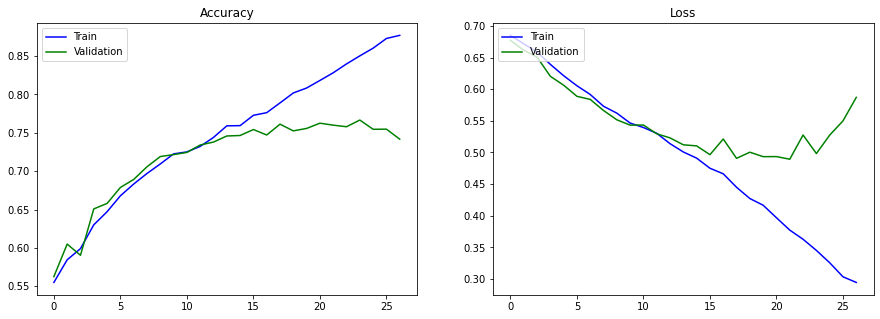

In [15]:
from utilities import plot_training_history
plot_training_history(history)

In [16]:
# Save model
save_path = "saved_models\\" + model.name + ".h5"
model.save( save_path )

#### Validation Accuracy: 74.17
#### Validation Loss: 0.2941